# Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Read the CSV file
df = pd.read_csv('C:/Users/Sayan Mondal/Desktop/New folder (4)/avocado.csv')

# Exploratory Data Analysis (EDA)

In [3]:
df.shape

(18249, 14)

In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [8]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in column {col}: {unique_values}")

Unique values in column Unnamed: 0: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]
Unique values in column Date: ['2015-12-27' '2015-12-20' '2015-12-13' '2015-12-06' '2015-11-29'
 '2015-11-22' '2015-11-15' '2015-11-08' '2015-11-01' '2015-10-25'
 '2015-10-18' '2015-10-11' '2015-10-04' '2015-09-27' '2015-09-20'
 '2015-09-13' '2015-09-06' '2015-08-30' '2015-08-23' '2015-08-16'
 '2015-08-09' '2015-08-02' '2015-07-26' '2015-07-19' '2015-07-12'
 '2015-07-05' '2015-06-28' '2015-06-21' '2015-06-14' '2015-06-07'
 '2015-05-31' '2015-05-24' '2015-05-17' '2015-05-10' '2015-05-03'
 '2015-04-26' '2015-04-19' '2015-04-12' '2015-04-05' '2015-03-29'
 '2015-03-22' '2015-03-15' '2015-03-08' '2015-03-01' '2015-02-22'
 '2015-02-15' '2015-02-08' '2015-02-01' '2015-01-25' '2015-01-18'
 '2015-01-11' '2015-01-04' '2016-12-25' '2016-12-18' '2016-12-11'
 '2016-12-04' '2016-11-27' '2016-11-20' '2016

In [9]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [10]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# DATA VISUALIZATION

conventional    9126
organic         9123
Name: type, dtype: int64


<Axes: xlabel='type', ylabel='count'>

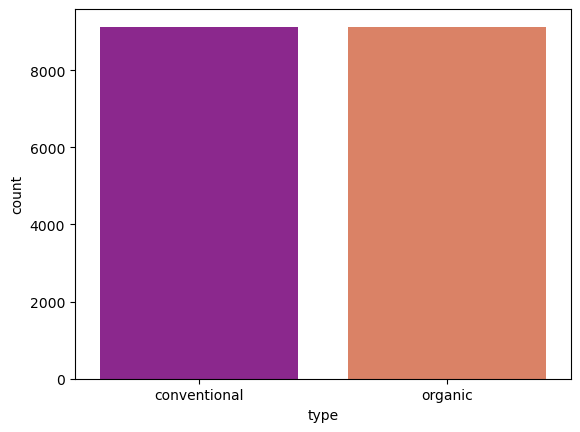

In [11]:
print(df['type'].value_counts())
sns.countplot(x='type',data=df,palette='plasma')

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


<Axes: xlabel='year', ylabel='count'>

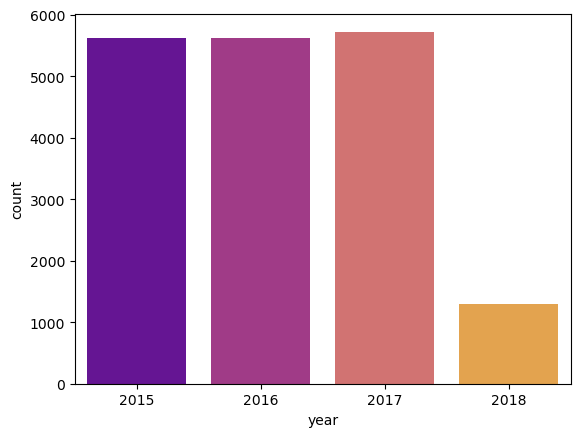

In [12]:
print(df['year'].value_counts())
sns.countplot(x='year',data=df,palette='plasma')

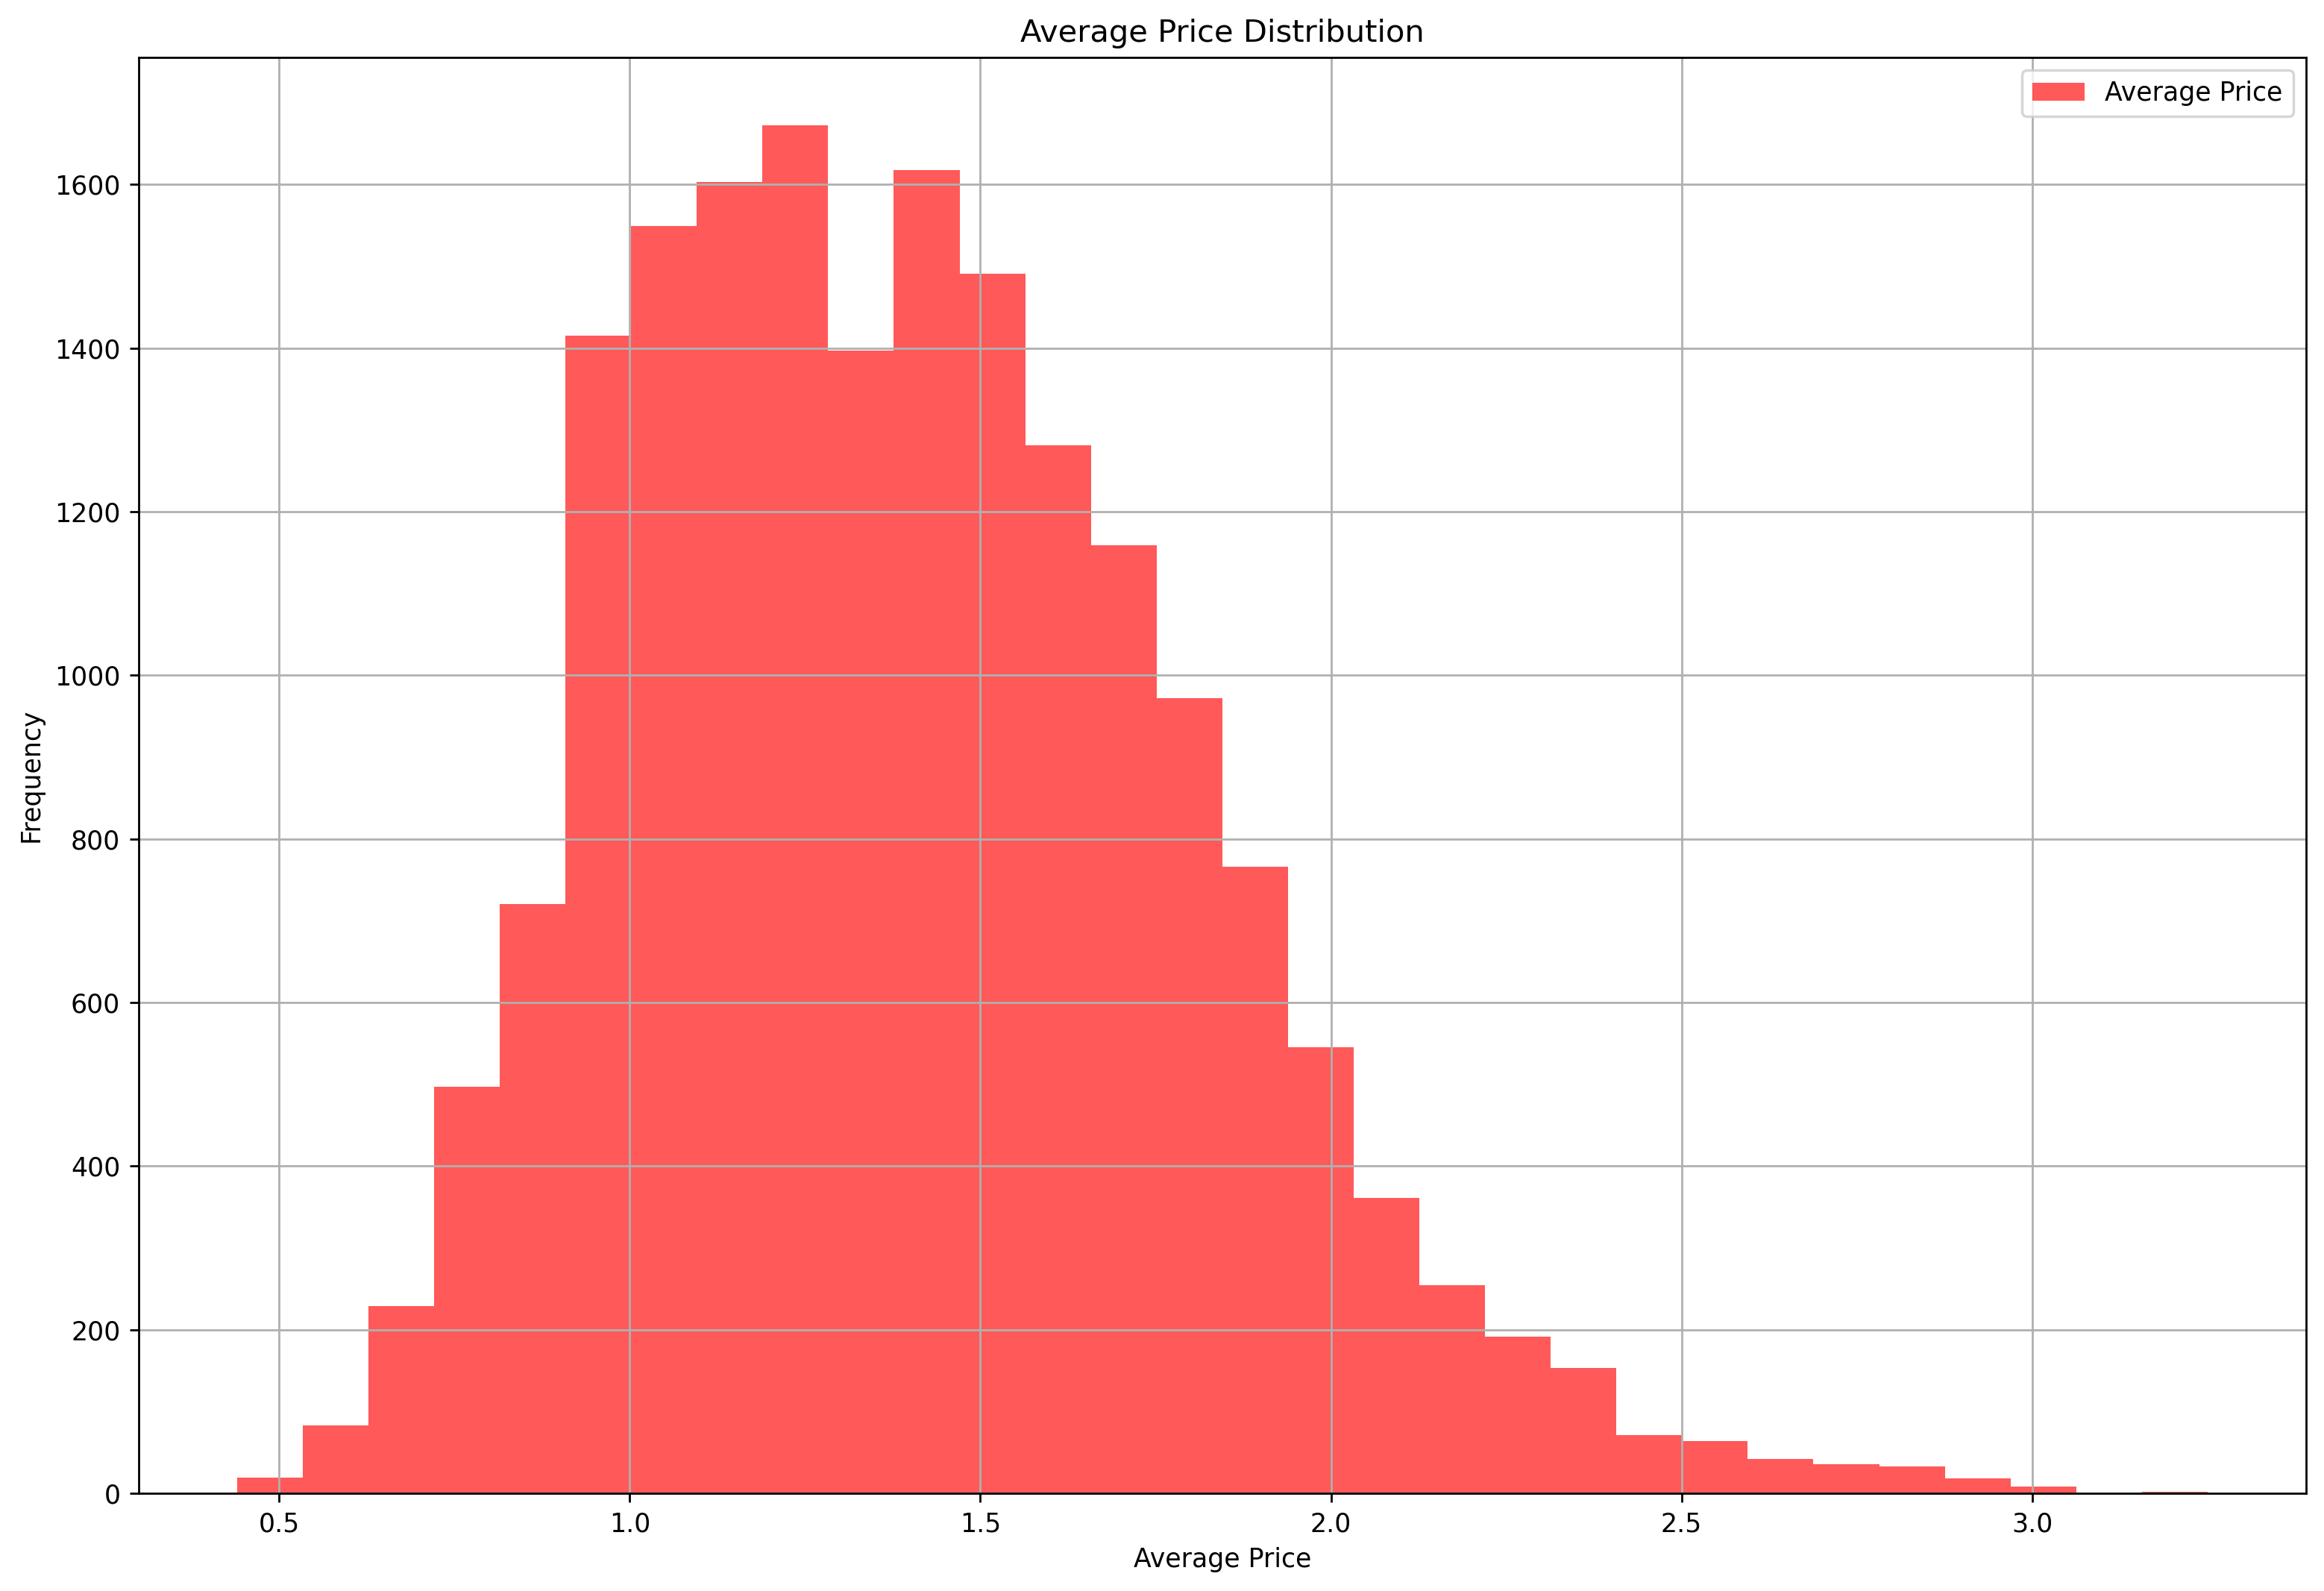

In [13]:
plt.figure(figsize=(15,10),dpi=250)
df["AveragePrice"].plot(kind="hist",color="red",bins=30,grid=True,alpha=0.65,label="Average Price")
plt.legend()
plt.xlabel("Average Price")
plt.title("Average Price Distribution")
plt.show()

C:\Users\Sayan Mondal\AppData\Local\Temp\ipykernel_7056\2545908272.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  byRegion=df.groupby('region').mean()


Text(0.5, 1.0, 'Average Price According to Region')

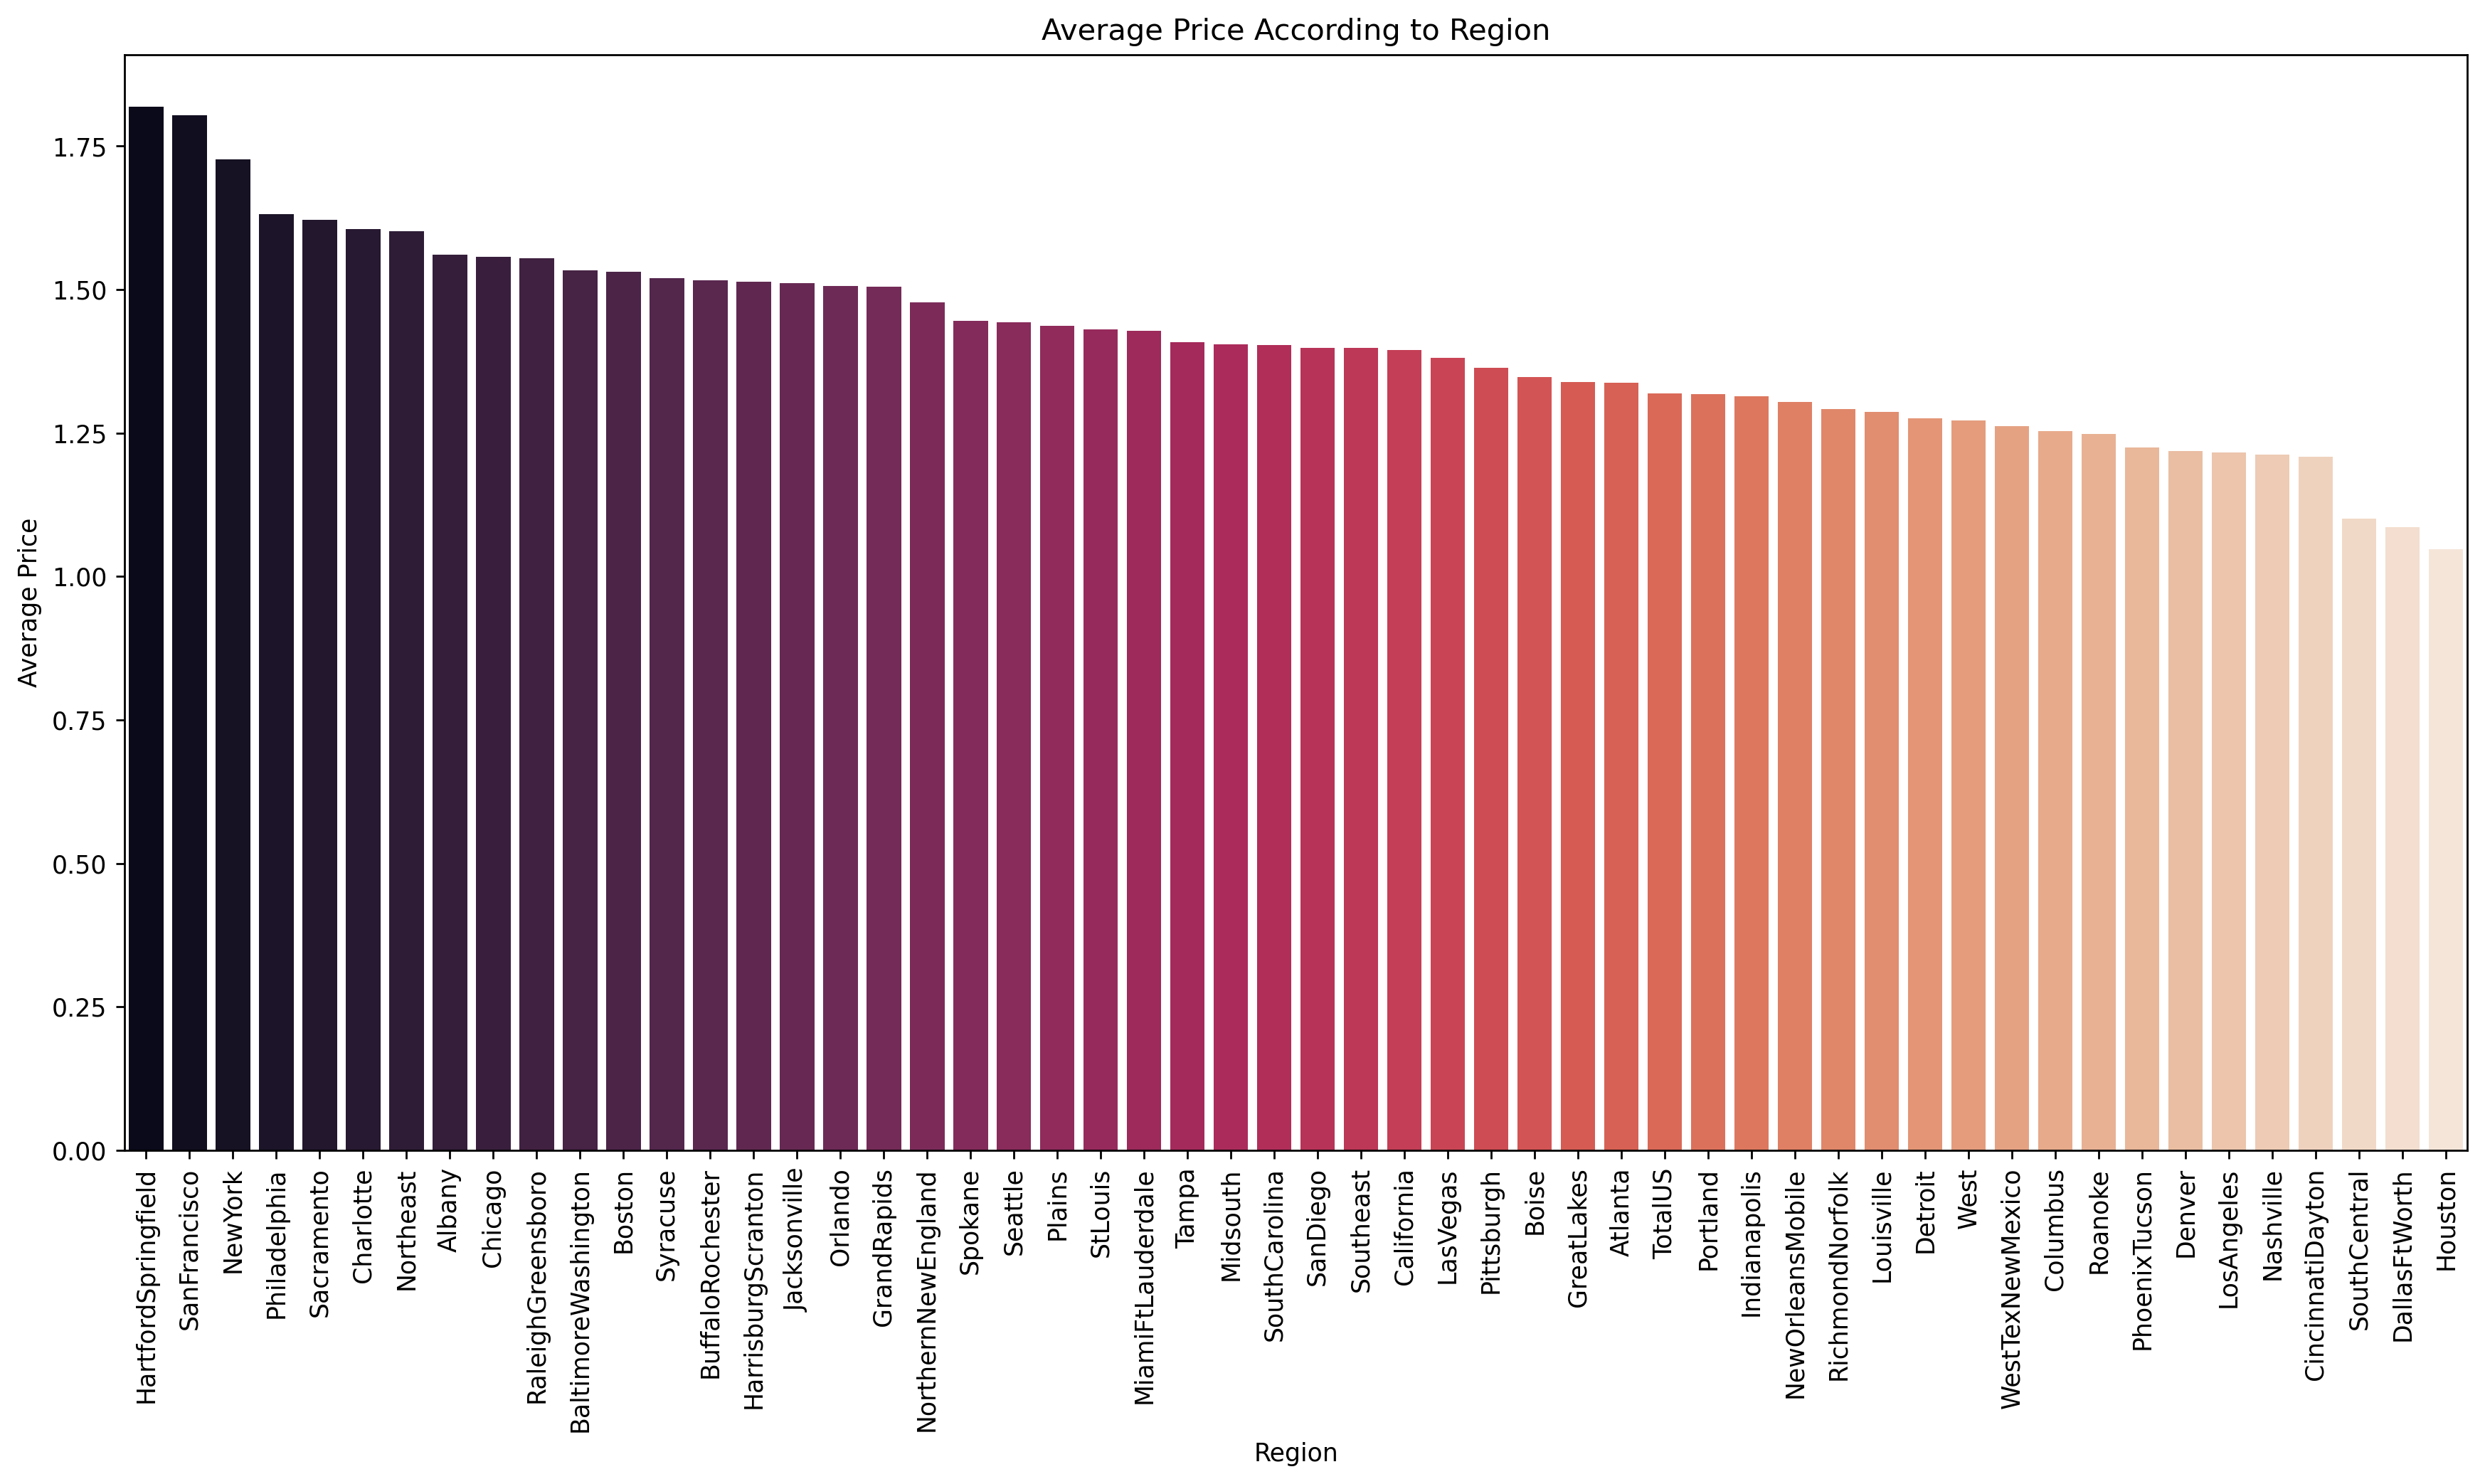

In [14]:
byRegion=df.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
plt.figure(figsize=(17,8),dpi=250)
sns.barplot(x = byRegion.index,y=byRegion["AveragePrice"],data = byRegion,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

<Figure size 1500x1000 with 0 Axes>

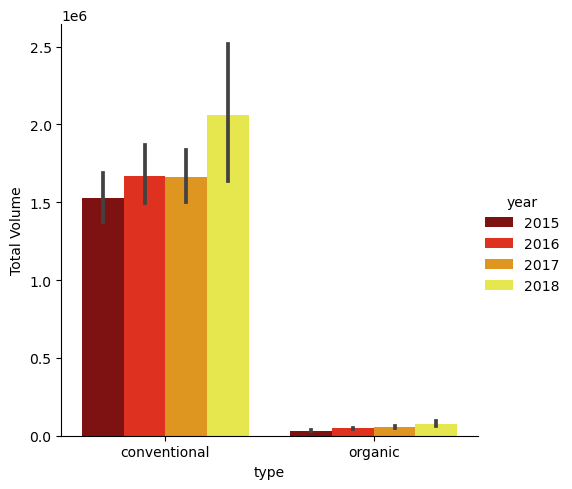

In [15]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="year", kind="bar", data=df, palette="hot")
plt.show()

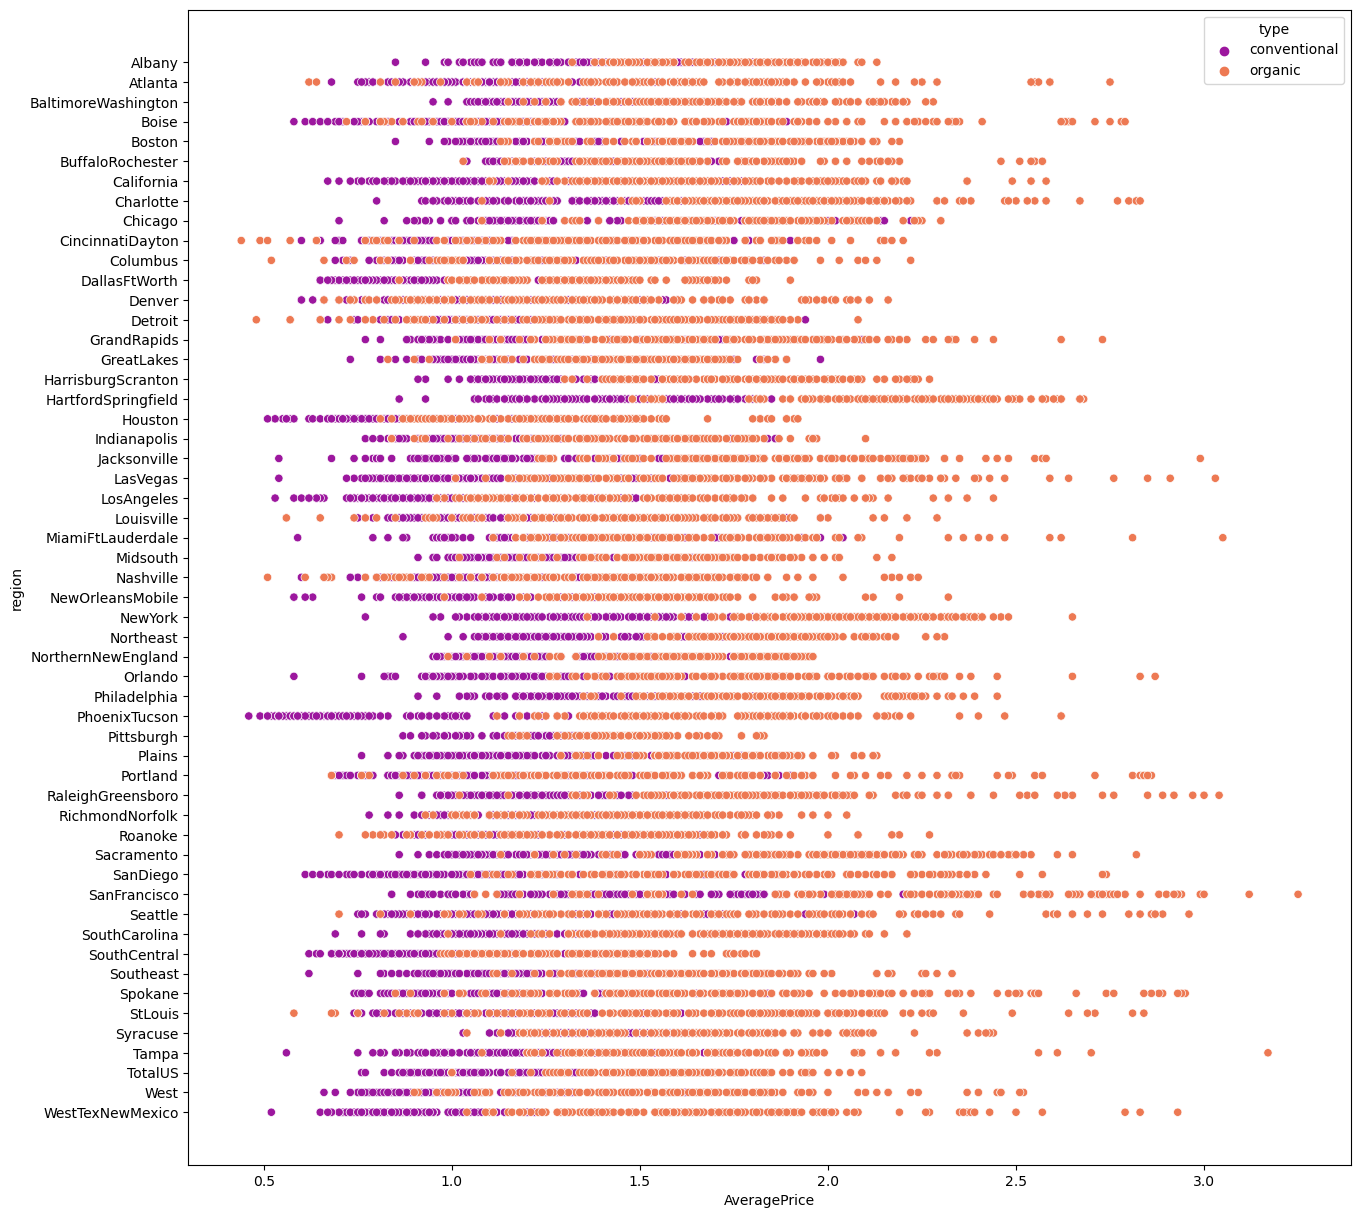

In [16]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df, palette="plasma")
plt.show()

C:\Users\Sayan Mondal\AppData\Local\Temp\ipykernel_7056\2687817211.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr()))
C:\Users\Sayan Mondal\AppData\Local\Temp\ipykernel_7056\2687817211.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdBu',


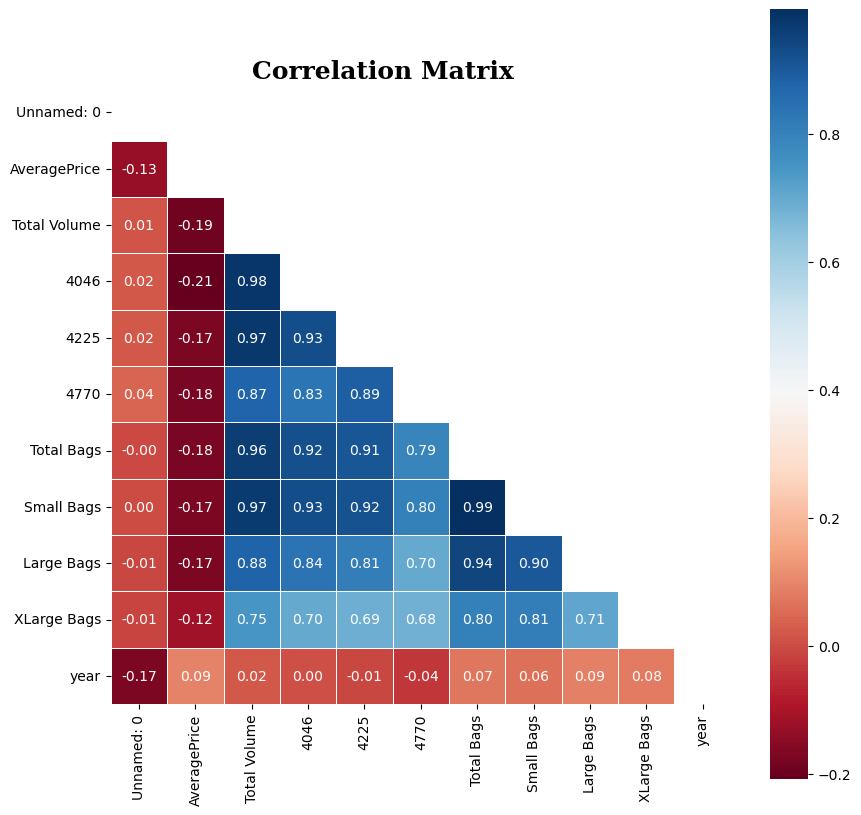

In [17]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))

mask = np.triu(np.ones_like(df.corr()))
ax.text(2.5, -0.1, 'Correlation Matrix', fontsize=18, fontweight='bold', fontfamily='serif')
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdBu', 
            square=True, mask=mask, linewidth=0.7, ax=ax)
plt.show()

In [18]:
df.corr()

C:\Users\Sayan Mondal\AppData\Local\Temp\ipykernel_7056\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


# Data Preprocessing

In [19]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df['Year']=df['Date'].apply(lambda x:x.year)
df.drop('year',axis=1,inplace=True)

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
# Encode categorical features
categorical_features = ["type", "Year"] + list(df.filter(like="region_"))
for feature in categorical_features:
    encoder = LabelEncoder()
    df[feature] = encoder.fit_transform(df[feature])


<Axes: >

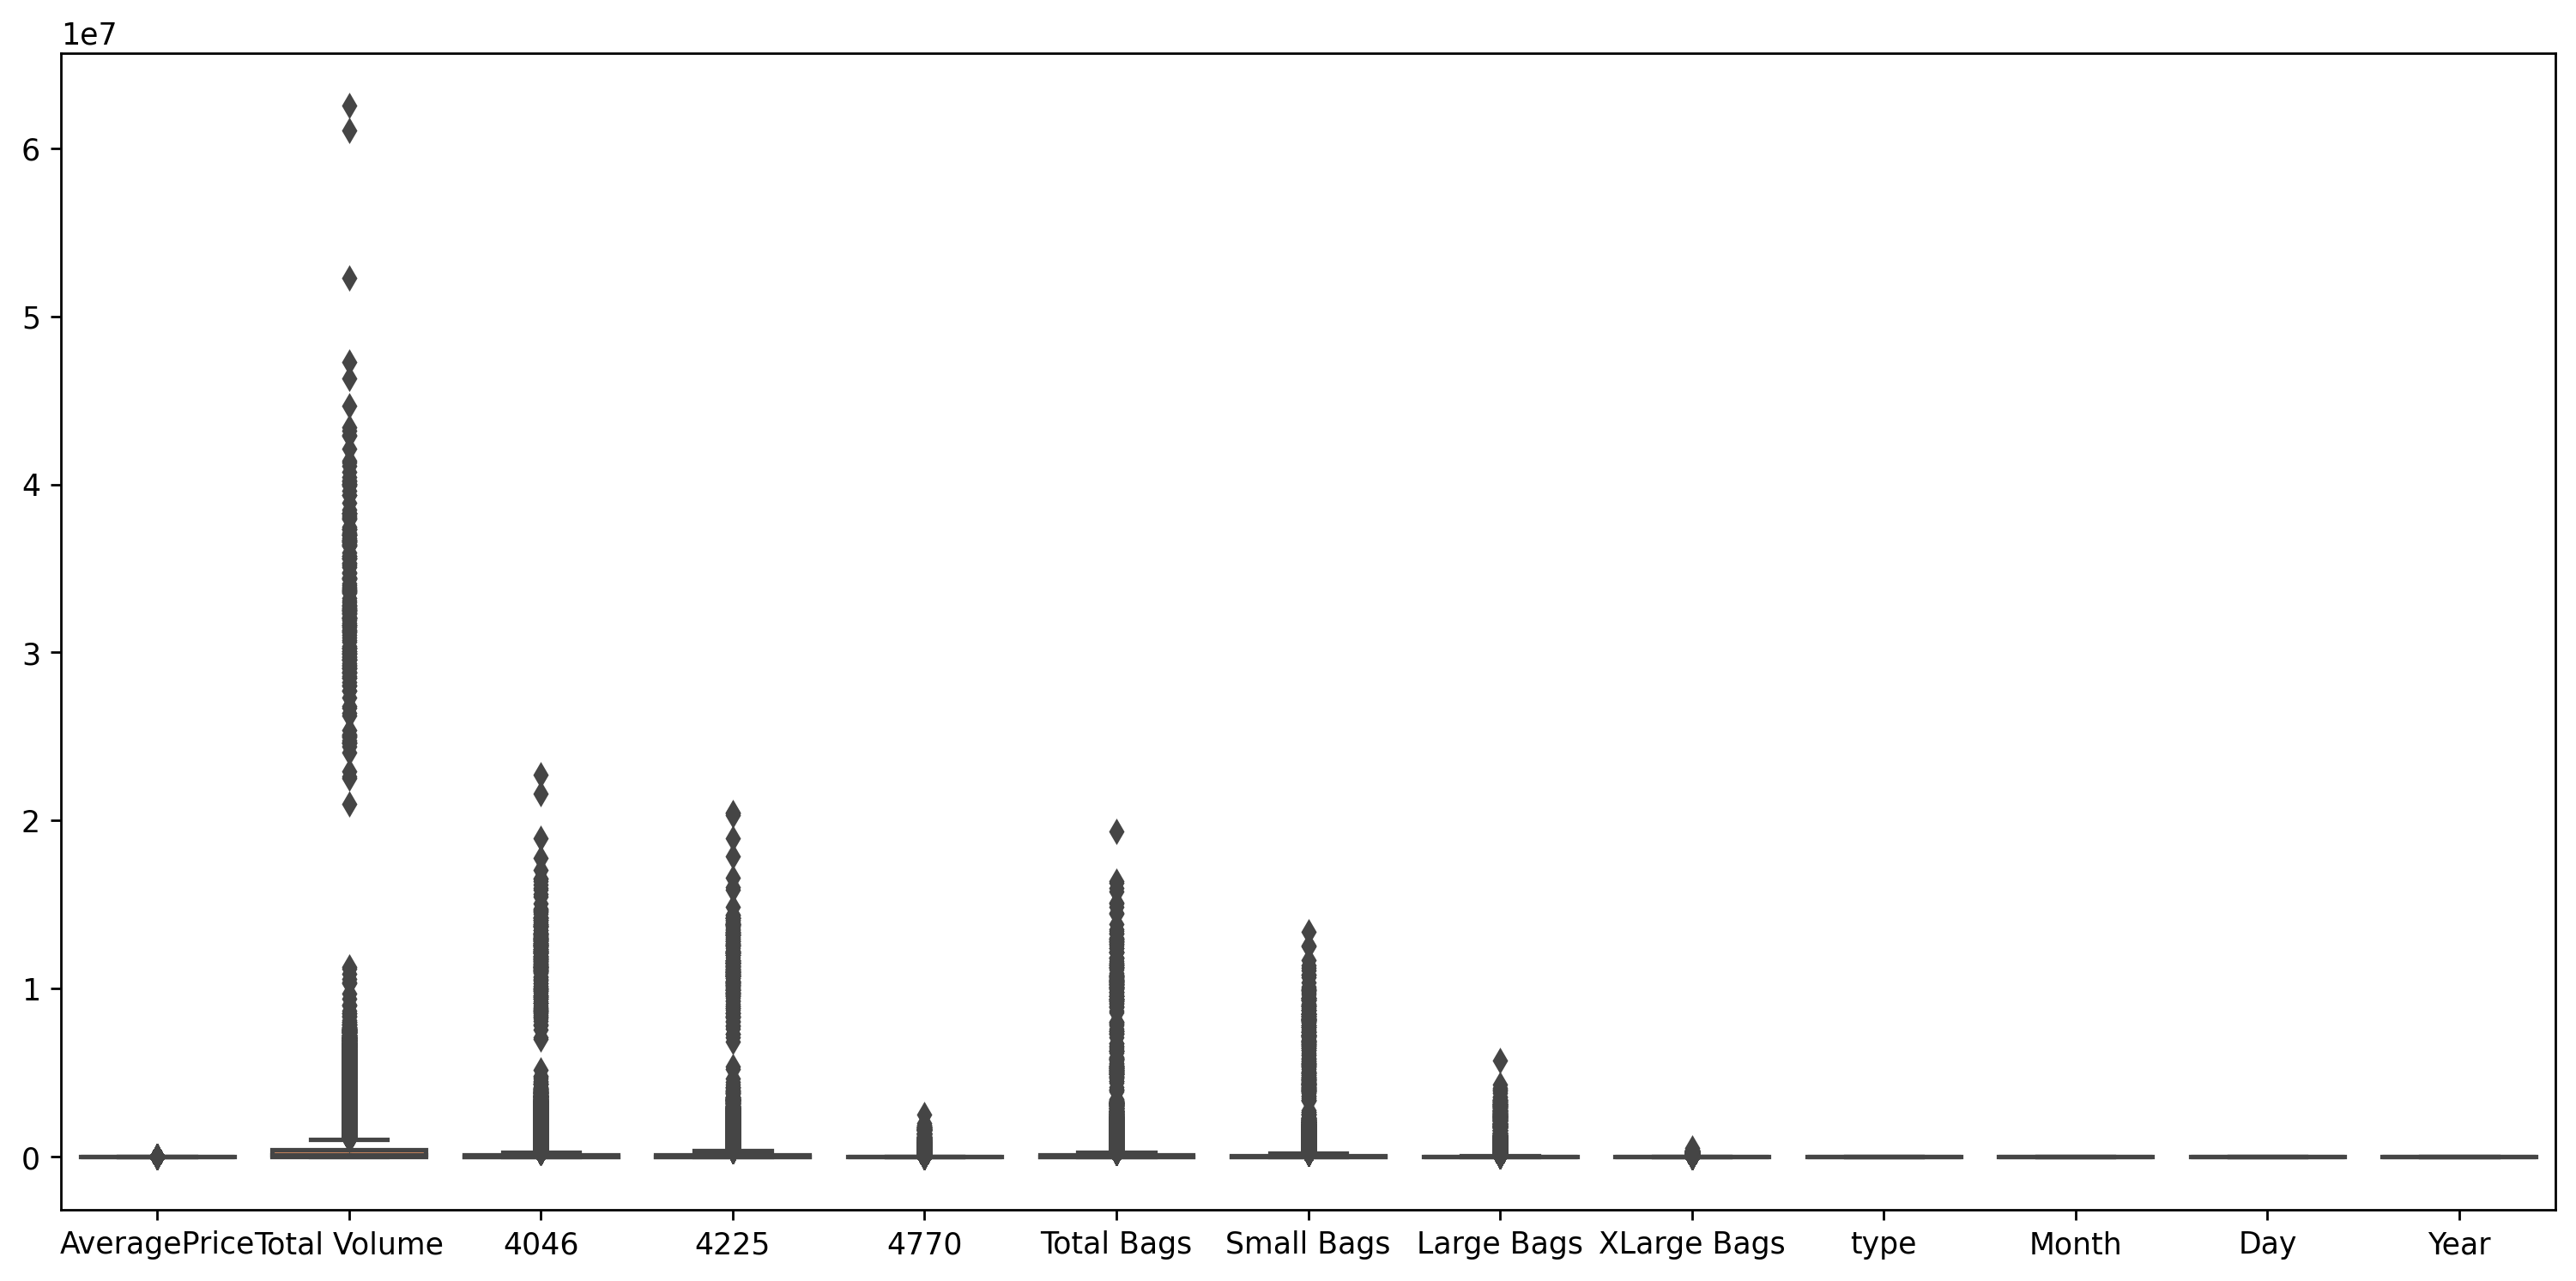

In [21]:
plt.figure(figsize=(15,7),dpi=250)
sns.boxplot(data = df[[
 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region',
       'Month', 'Day', 'Year']])

In [22]:
# Calculate the first and third quartile (25th and 75th percentile) of the column
Q1 = df["Total Volume"].quantile(0.25)
Q3 = df["Total Volume"].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Set a threshold for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5 * IQR

# Create a mask to identify outliers
outliers_mask = (df["Total Volume"] < Q1 - threshold) | (df["Total Volume"] > Q3 + threshold)

# Remove outliers from the DataFrame
df = df[~outliers_mask]


In [23]:
df.shape

(15952, 16)

<Axes: >

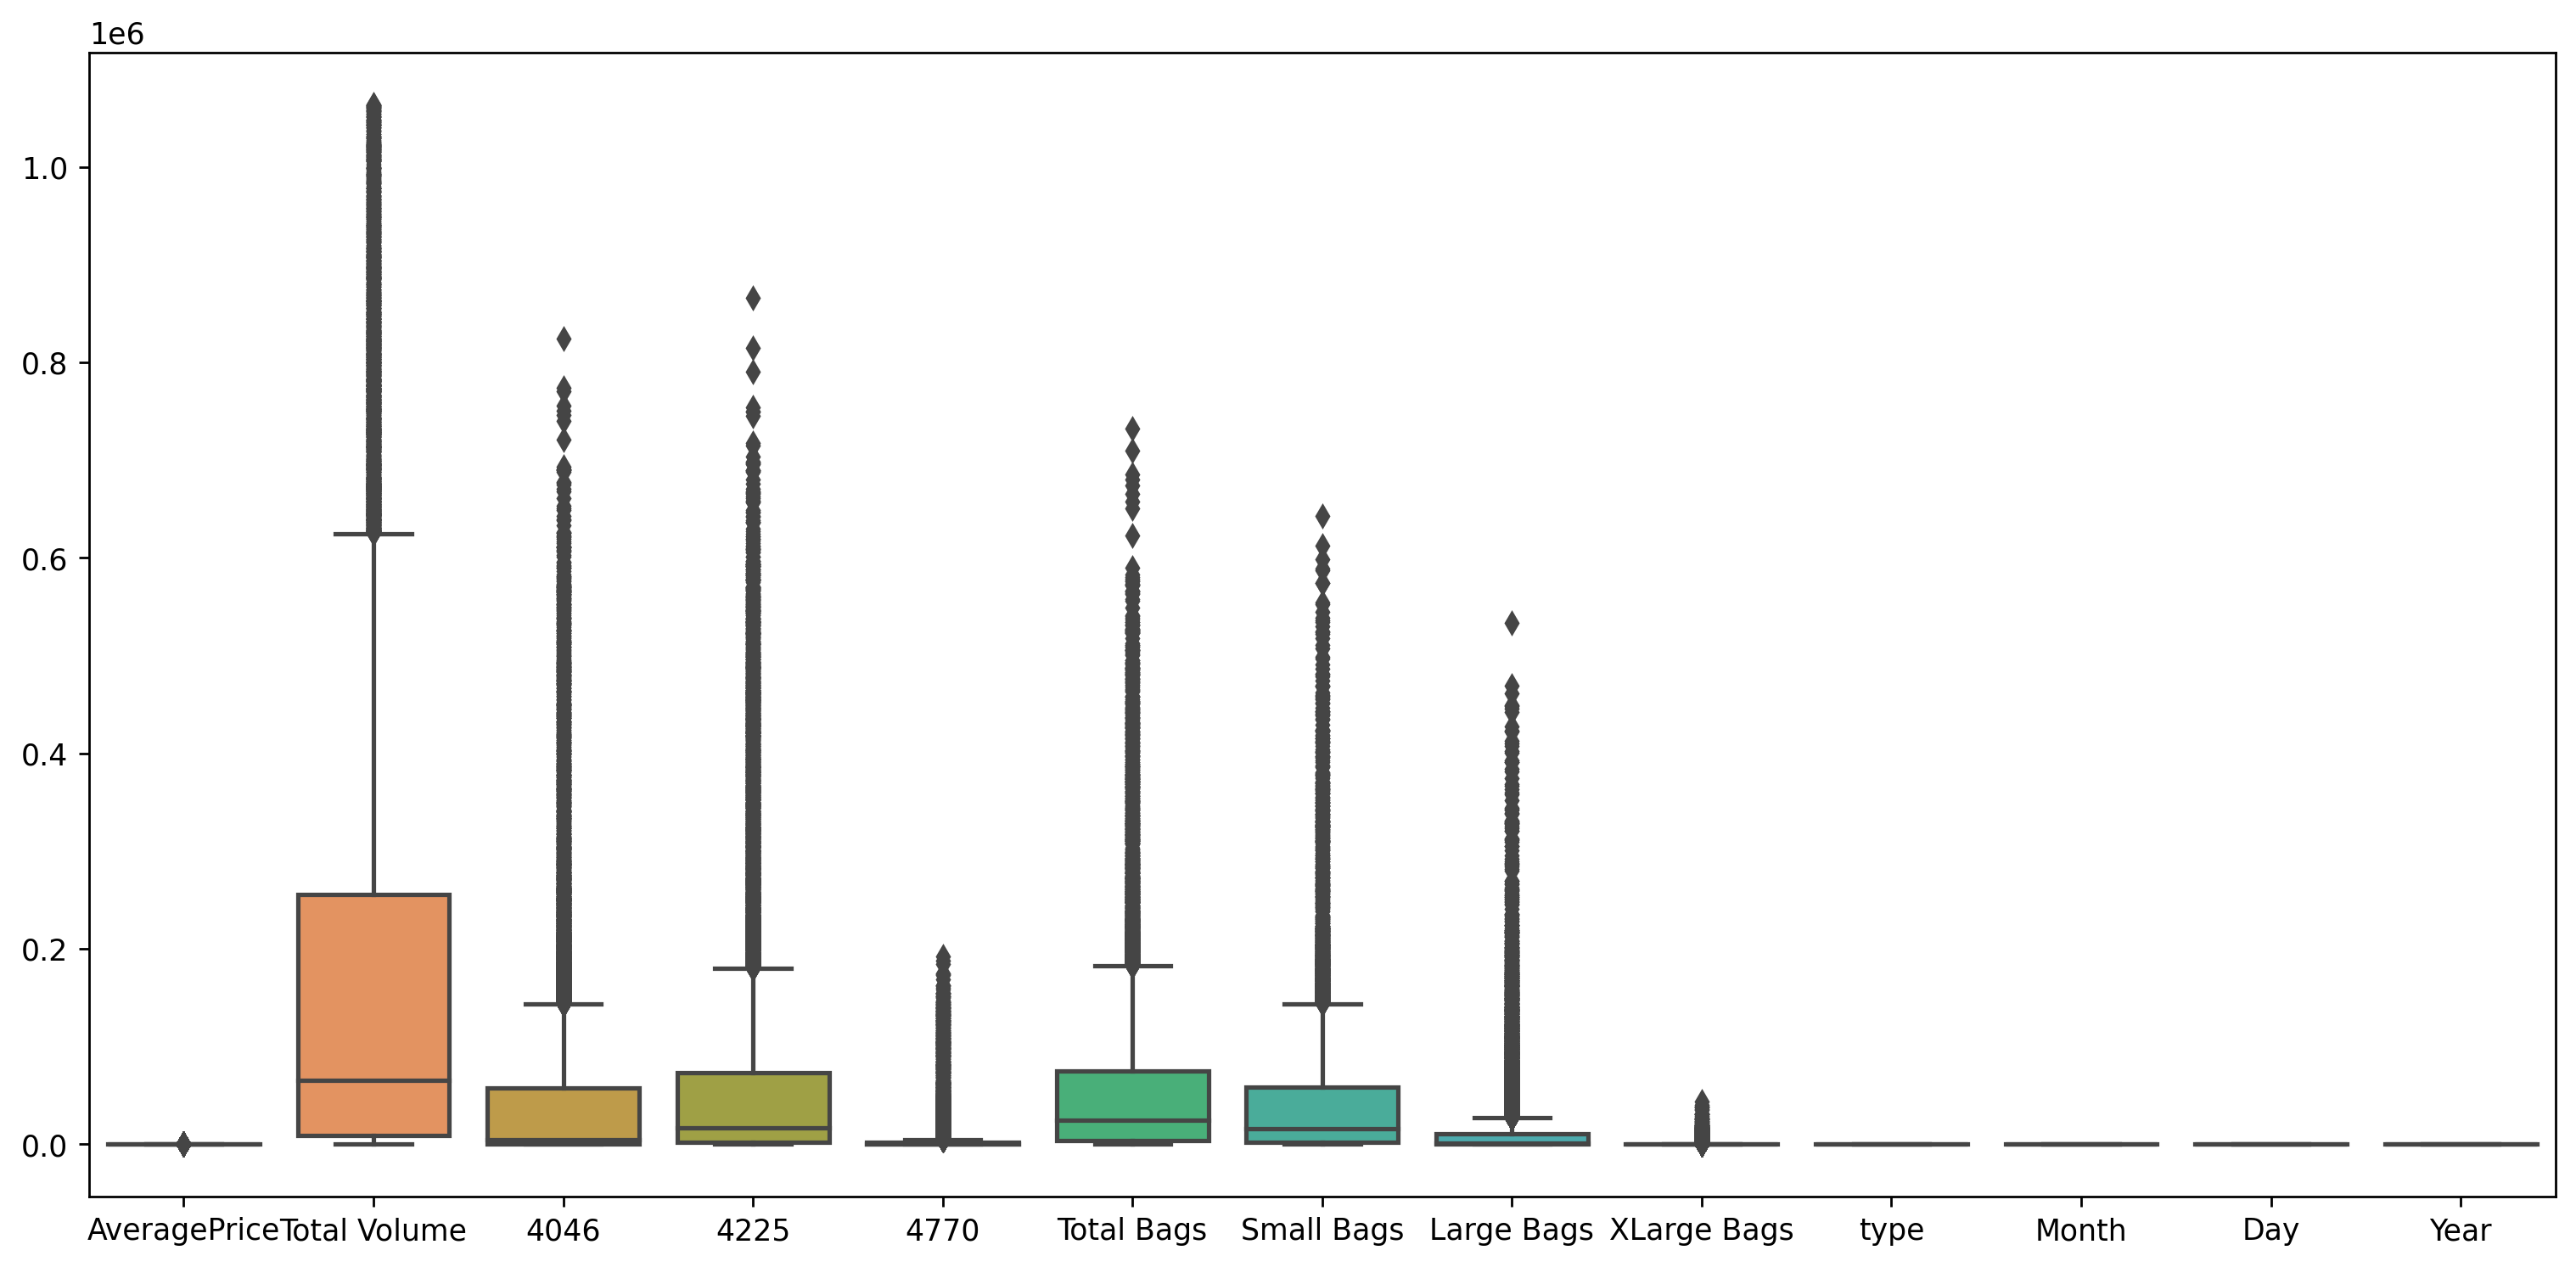

In [24]:
plt.figure(figsize=(15,7),dpi=250)
sns.boxplot(data = df[[
 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region',
       'Month', 'Day', 'Year']])

# Splitting the data for Classification Modelling

In [25]:
y = df['region']

# Features (excluding target variable and irrelevant columns)
X = df.drop(['Unnamed: 0', 'Date', 'region'], axis=1)

# Convert 'type' to numerical values
X['type'] = pd.get_dummies(X['type'], drop_first=True)

In [26]:
print(X)

       AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  Month  Day  Year  
0     

In [27]:
print(y)

0                  Albany
1                  Albany
2                  Albany
3                  Albany
4                  Albany
               ...       
18244    WestTexNewMexico
18245    WestTexNewMexico
18246    WestTexNewMexico
18247    WestTexNewMexico
18248    WestTexNewMexico
Name: region, Length: 15952, dtype: object


In [28]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [30]:
print(X_train)

[[ 0.87263624  1.57253627  0.89003072 ...  0.78483356 -0.3044734
  -1.21700384]
 [ 0.41927396 -0.64855306 -0.51662032 ... -0.91233271  0.26670516
   1.98531646]
 [-1.29342799  0.76301611  0.86574772 ...  1.63341669  1.06635516
  -0.14956374]
 ...
 [-0.94081288  0.00864301 -0.38967682 ... -0.62947167  0.38094088
  -1.21700384]
 [ 0.06665885 -0.70508679 -0.51396609 ... -1.47805481 -0.98988768
   1.98531646]
 [ 1.42674569 -0.72563788 -0.51324808 ...  0.78483356 -0.3044734
  -1.21700384]]


# Various Classification Models to find the best one

In [31]:
# Logistic Regression with Hyperparameters
logreg = LogisticRegression(C=1.0, max_iter=1000)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, logreg_pred))
print("Precision:", precision_score(y_test, logreg_pred, average='weighted'))
print("Recall:", recall_score(y_test, logreg_pred, average='weighted'))
print("F1-score:", f1_score(y_test, logreg_pred, average='weighted'))
print(classification_report(y_test, logreg_pred))

Logistic Regression:
Accuracy: 0.4080225634597305
Precision: 0.4677333563564957
Recall: 0.4080225634597305
F1-score: 0.4071045040206648
                     precision    recall  f1-score   support

             Albany       0.36      0.49      0.42        75
            Atlanta       0.42      0.22      0.29        72
BaltimoreWashington       0.64      0.47      0.54        68
              Boise       0.37      0.48      0.42        81
             Boston       0.51      0.39      0.44        66
   BuffaloRochester       0.27      0.38      0.32        66
         California       0.43      0.73      0.54        26
          Charlotte       0.33      0.48      0.39        67
            Chicago       0.75      0.70      0.72        67
   CincinnatiDayton       0.39      0.59      0.47        71
           Columbus       0.21      0.22      0.21        59
      DallasFtWorth       0.20      0.11      0.14        44
             Denver       0.51      0.45      0.48        56
         

In [32]:
# Support Vector Machine
svc = SVC(C=1.0, kernel='rbf', gamma='scale')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print("Support Vector Machine:")
print("Accuracy:", accuracy_score(y_test, svc_pred))
print("Precision:", precision_score(y_test, svc_pred, average='weighted'))
print("Recall:", recall_score(y_test, svc_pred, average='weighted'))
print("F1-score:", f1_score(y_test, svc_pred, average='weighted'))
print(classification_report(y_test, svc_pred))

Support Vector Machine:
Accuracy: 0.4656847383265434
Precision: 0.6220516725367905
Recall: 0.4656847383265434
F1-score: 0.4973571860867141
                     precision    recall  f1-score   support

             Albany       0.19      0.47      0.27        75
            Atlanta       0.76      0.44      0.56        72
BaltimoreWashington       0.82      0.47      0.60        68
              Boise       1.00      0.51      0.67        81
             Boston       0.72      0.50      0.59        66
   BuffaloRochester       0.70      0.39      0.50        66
         California       0.66      0.88      0.75        26
          Charlotte       0.34      0.52      0.41        67
            Chicago       0.85      0.70      0.77        67
   CincinnatiDayton       0.54      0.52      0.53        71
           Columbus       0.53      0.32      0.40        59
      DallasFtWorth       0.26      0.11      0.16        44
             Denver       0.81      0.61      0.69        56
      

In [33]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Precision:", precision_score(y_test, knn_pred, average='weighted'))
print("Recall:", recall_score(y_test, knn_pred, average='weighted'))
print("F1-score:", f1_score(y_test, knn_pred, average='weighted'))
print(classification_report(y_test, knn_pred))

K-Nearest Neighbors:
Accuracy: 0.3497336258226261
Precision: 0.4450747022316392
Recall: 0.3497336258226261
F1-score: 0.3661006370973301
                     precision    recall  f1-score   support

             Albany       0.08      0.24      0.12        75
            Atlanta       0.13      0.42      0.20        72
BaltimoreWashington       0.21      0.53      0.30        68
              Boise       0.20      0.37      0.26        81
             Boston       0.28      0.47      0.35        66
   BuffaloRochester       0.16      0.35      0.22        66
         California       0.59      0.65      0.62        26
          Charlotte       0.21      0.37      0.27        67
            Chicago       0.49      0.57      0.53        67
   CincinnatiDayton       0.30      0.51      0.38        71
           Columbus       0.13      0.27      0.17        59
      DallasFtWorth       0.11      0.16      0.13        44
             Denver       0.56      0.62      0.59        56
         

In [34]:
# Decision Tree
dtree = DecisionTreeClassifier(max_depth=None, min_samples_split=2)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, dtree_pred))
print("Precision:", precision_score(y_test, dtree_pred, average='weighted'))
print("Recall:", recall_score(y_test, dtree_pred, average='weighted'))
print("F1-score:", f1_score(y_test, dtree_pred, average='weighted'))
print(classification_report(y_test, dtree_pred))

Decision Tree:
Accuracy: 0.7718583516139141
Precision: 0.7749545012078094
Recall: 0.7718583516139141
F1-score: 0.7720432723549578
                     precision    recall  f1-score   support

             Albany       0.84      0.77      0.81        75
            Atlanta       0.66      0.65      0.66        72
BaltimoreWashington       0.92      0.88      0.90        68
              Boise       0.78      0.80      0.79        81
             Boston       0.74      0.89      0.81        66
   BuffaloRochester       0.72      0.82      0.77        66
         California       0.87      1.00      0.93        26
          Charlotte       0.80      0.79      0.80        67
            Chicago       0.89      0.93      0.91        67
   CincinnatiDayton       0.82      0.76      0.79        71
           Columbus       0.66      0.69      0.68        59
      DallasFtWorth       0.81      0.86      0.84        44
             Denver       0.90      0.79      0.84        56
            Det

In [35]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=None)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred, average='weighted'))
print("Recall:", recall_score(y_test, rf_pred, average='weighted'))
print("F1-score:", f1_score(y_test, rf_pred, average='weighted'))
print(classification_report(y_test, rf_pred))

Random Forest:
Accuracy: 0.8928235662801629
Precision: 0.8945915348758713
Recall: 0.8928235662801629
F1-score: 0.8928960587530798
                     precision    recall  f1-score   support

             Albany       0.83      0.96      0.89        75
            Atlanta       0.87      0.86      0.87        72
BaltimoreWashington       0.99      1.00      0.99        68
              Boise       0.89      0.83      0.86        81
             Boston       1.00      0.98      0.99        66
   BuffaloRochester       0.86      0.77      0.82        66
         California       0.96      1.00      0.98        26
          Charlotte       0.90      0.90      0.90        67
            Chicago       0.99      0.99      0.99        67
   CincinnatiDayton       0.88      0.93      0.90        71
           Columbus       0.91      0.88      0.90        59
      DallasFtWorth       0.98      0.93      0.95        44
             Denver       0.98      0.95      0.96        56
            Det

In [36]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print("Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Precision:", precision_score(y_test, nb_pred, average='weighted'))
print("Recall:", recall_score(y_test, nb_pred, average='weighted'))
print("F1-score:", f1_score(y_test, nb_pred, average='weighted'))
print(classification_report(y_test, nb_pred))

Naive Bayes:
Accuracy: 0.31776872453776245
Precision: 0.5730145226484369
Recall: 0.31776872453776245
F1-score: 0.37816402692802925


C:\Users\Sayan Mondal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sayan Mondal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sayan Mondal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

             Albany       0.96      0.31      0.46        75
            Atlanta       0.40      0.29      0.34        72
BaltimoreWashington       0.72      0.46      0.56        68
              Boise       1.00      0.37      0.54        81
             Boston       0.50      0.30      0.38        66
   BuffaloRochester       0.62      0.23      0.33        66
         California       0.93      0.96      0.94        26
          Charlotte       0.91      0.31      0.47        67
            Chicago       0.92      0.52      0.67        67
   CincinnatiDayton       0.93      0.35      0.51        71
           Columbus       0.44      0.14      0.21        59
      DallasFtWorth       0.00      0.00      0.00        44
             Denver       0.48      0.48      0.48        56
            Detroit       0.51      0.24      0.33        79
        GrandRapids       0.90      0.28      0.42        65
         GreatLakes    

C:\Users\Sayan Mondal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import joblib

# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=None)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Print evaluation metrics
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred, average='weighted'))
print("Recall:", recall_score(y_test, rf_pred, average='weighted'))
print("F1-score:", f1_score(y_test, rf_pred, average='weighted'))
print(classification_report(y_test, rf_pred))

# Save the Random Forest model
joblib.dump(rf, 'random_forest_model.pkl')

# Print why the model is selected
print("\nSelected Model: Random Forest")
print("Reasons for Selection:")
print("- Random Forest is chosen due to its strong performance across multiple metrics.")
print("- It provides a good balance between bias and variance, avoiding overfitting.")
print("- Random Forest is robust and works well with various types of data.")
print("- The model has demonstrated high accuracy, precision, recall, and F1-score on the test set.")
print("- Considering the problem type, Random Forest is a suitable choice for classification tasks.")


Random Forest:
Accuracy: 0.8931369476653087
Precision: 0.8947837642457088
Recall: 0.8931369476653087
F1-score: 0.8932504552283789
                     precision    recall  f1-score   support

             Albany       0.84      0.93      0.89        75
            Atlanta       0.86      0.85      0.85        72
BaltimoreWashington       0.97      1.00      0.99        68
              Boise       0.91      0.85      0.88        81
             Boston       0.98      0.98      0.98        66
   BuffaloRochester       0.89      0.83      0.86        66
         California       0.93      1.00      0.96        26
          Charlotte       0.89      0.88      0.89        67
            Chicago       0.97      0.99      0.98        67
   CincinnatiDayton       0.90      0.93      0.92        71
           Columbus       0.91      0.86      0.89        59
      DallasFtWorth       0.93      0.95      0.94        44
             Denver       1.00      0.95      0.97        56
            Det

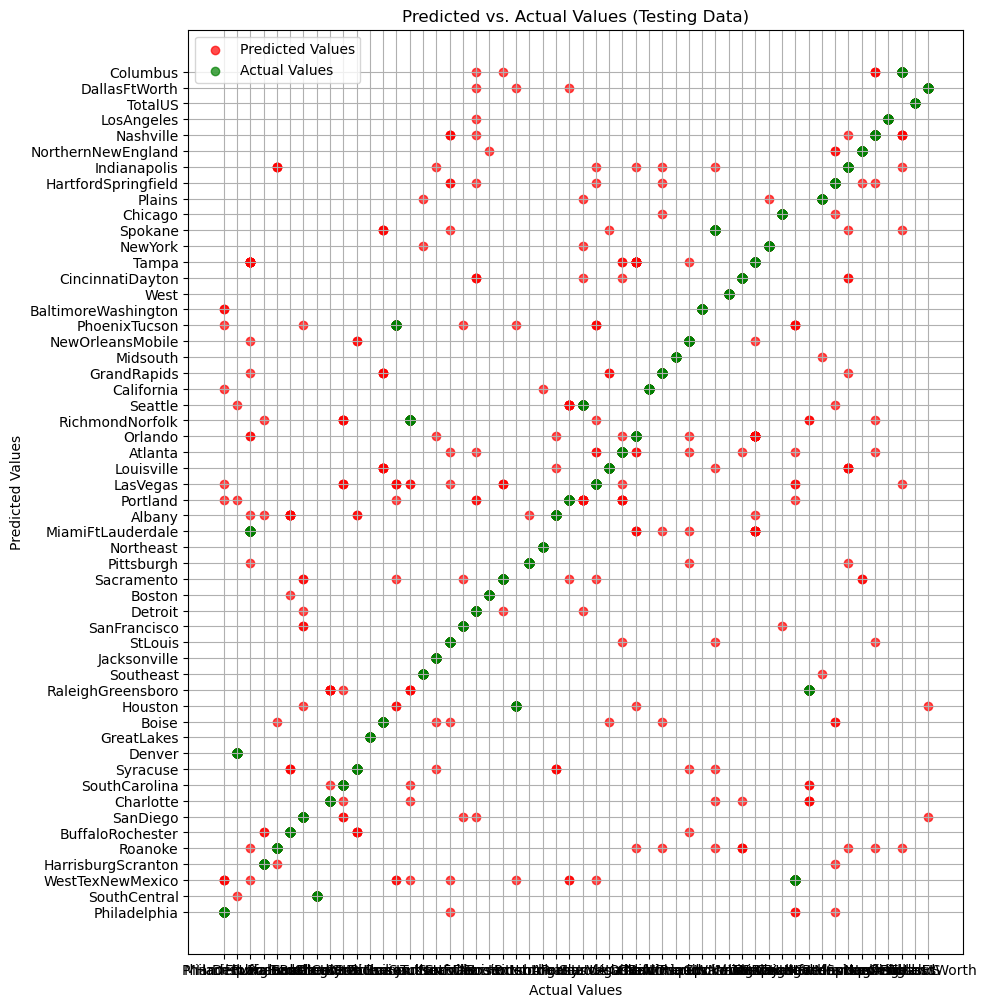

In [38]:
# Testing data scatter plot with color customization
plt.figure(figsize=(10, 12))
plt.scatter(y_test, rf_pred, label='Predicted Values', color='red', alpha=0.7)

# Green for actual values
plt.scatter(y_test, y_test, label='Actual Values', color='green', alpha=0.7)  # Plot actual values directly on the diagonal

plt.title('Predicted vs. Actual Values (Testing Data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()

# FEATURE ENGINEERING

In [39]:
df['region'] = pd.Categorical(df['region'])
dfDummies_region = pd.get_dummies(df['region'], prefix = 'region')
dfDummies_region

,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
df = pd.concat([df, dfDummies_region], axis=1)
df.drop(columns="region",inplace=True)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,...,0,0,0,0,0,0,0,0,0,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,...,0,0,0,0,0,0,0,0,0,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,...,0,0,0,0,0,0,0,0,0,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,...,0,0,0,0,0,0,0,0,0,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,...,0,0,0,0,0,0,0,0,0,1
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,...,0,0,0,0,0,0,0,0,0,1
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,...,0,0,0,0,0,0,0,0,0,1
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,...,0,0,0,0,0,0,0,0,0,1


In [41]:
df['Month'] = pd.Categorical(df['Month'])
dfDummies_month = pd.get_dummies(df['Month'], prefix = 'month')
dfDummies_month

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,1,0,0,0,0,0,0,0,0,0,0
18245,1,0,0,0,0,0,0,0,0,0,0,0
18246,1,0,0,0,0,0,0,0,0,0,0,0
18247,1,0,0,0,0,0,0,0,0,0,0,0


In [42]:
df = pd.concat([df, dfDummies_month], axis=1)
df.drop(columns="Month",inplace=True)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,...,0,0,0,0,0,0,0,0,0,1
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,...,0,0,0,0,0,0,0,0,0,1
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,...,0,0,0,0,0,0,0,0,0,1
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,...,0,0,0,0,0,0,0,0,0,1
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,...,0,0,0,0,0,0,0,0,1,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15952 entries, 0 to 18248
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  15952 non-null  int64         
 1   Date                        15952 non-null  datetime64[ns]
 2   AveragePrice                15952 non-null  float64       
 3   Total Volume                15952 non-null  float64       
 4   4046                        15952 non-null  float64       
 5   4225                        15952 non-null  float64       
 6   4770                        15952 non-null  float64       
 7   Total Bags                  15952 non-null  float64       
 8   Small Bags                  15952 non-null  float64       
 9   Large Bags                  15952 non-null  float64       
 10  XLarge Bags                 15952 non-null  float64       
 11  type                        15952 non-null  int32     

In [44]:
df.drop('Date',axis=1,inplace=True)

In [45]:
X=df.iloc[:,2:79]
y=df['AveragePrice']
print(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

       Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0          64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1          54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2         118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3          78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4          51039.60   941.48   43838.39   75.78     6183.95     5986.26   
...             ...      ...        ...     ...         ...         ...   
18244      17074.83  2046.96    1529.20    0.00    13498.67    13066.82   
18245      13888.04  1191.70    3431.50    0.00     9264.84     8940.04   
18246      13766.76  1191.92    2452.79  727.94     9394.11     9351.80   
18247      16205.22  1527.63    2981.04  727.01    10969.54    10919.54   
18248      17489.58  2894.77    2356.13  224.53    12014.15    11988.14   

       Large Bags  XLarge Bags  type  Day  ...  month_3  month_4  month_5  \
0           93.25     

In [46]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [47]:
print(X_train)

[[-0.43227256 -0.50421556 -0.14305807 ... -0.30529747 -0.29254163
  -0.2885771 ]
 [-0.68322716 -0.51451626 -0.57666551 ... -0.30529747 -0.29254163
  -0.2885771 ]
 [ 1.1439493   2.66107669 -0.15130011 ... -0.30529747 -0.29254163
  -0.2885771 ]
 ...
 [-0.61604193 -0.51371643 -0.36258851 ...  3.2754939  -0.29254163
  -0.2885771 ]
 [ 0.79018239 -0.10754703  1.11979933 ... -0.30529747 -0.29254163
  -0.2885771 ]
 [-0.42992696 -0.46851062 -0.39229492 ... -0.30529747 -0.29254163
  -0.2885771 ]]


# VARIOUS REGRESSION MODEL TO FIND THE BEST ONE

In [48]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X_test.shape[1]-1)

    print('Explained_variance: ', round(explained_variance,4))    
    print('R2: ', round(r2,4))
    print('Adjusted_r2: ', round(adjusted_r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [49]:
from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=X_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [50]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
regression_results(y_test,y_pred)
model_accuracy(regressor)

Explained_variance:  0.5997
R2:  0.5995
Adjusted_r2:  0.5896
MAE:  0.1909
MSE:  0.0636
RMSE:  0.2523
Accuracy: 60.09 %
Standard Deviation: 1.82 %


In [51]:
from sklearn.ensemble import RandomForestRegressor

rand_regressor = RandomForestRegressor()
rand_regressor.fit(X_train, y_train)
y_pred_rf = rand_regressor.predict(X_test)
regression_results(y_test,y_pred_rf)
model_accuracy(rand_regressor)

Explained_variance:  0.8755
R2:  0.8755
Adjusted_r2:  0.8724
MAE:  0.0979
MSE:  0.0198
RMSE:  0.1407
Accuracy: 87.25 %
Standard Deviation: 0.82 %


In [52]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(criterion='squared_error', splitter='random', random_state=10)
decision_tree = DecisionTreeRegressor(splitter='random', random_state=10)

decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

regression_results(y_test,y_pred_dt)
model_accuracy(decision_tree)

Explained_variance:  0.8126
R2:  0.8126
Adjusted_r2:  0.808
MAE:  0.1132
MSE:  0.0298
RMSE:  0.1726
Accuracy: 78.77 %
Standard Deviation: 2.32 %


In [53]:
lasso = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
# ... (same steps as Linear Regression)
lasso.fit(X_train, y_train)
y_predla = lasso.predict(X_test)
regression_results(y_test,y_predla)
model_accuracy(lasso)

Explained_variance:  0.28
R2:  0.28
Adjusted_r2:  0.2621
MAE:  0.2613
MSE:  0.1144
RMSE:  0.3383
Accuracy: 27.60 %
Standard Deviation: 1.06 %


In [54]:
model5 = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Adjust alpha and l1_ratio
# ... (same steps as Linear Regression)
model5.fit(X_train, y_train)
y_pred4 = model5.predict(X_test)
regression_results(y_test,y_pred4)
model_accuracy(model5)

Explained_variance:  0.3545
R2:  0.3545
Adjusted_r2:  0.3385
MAE:  0.2454
MSE:  0.1026
RMSE:  0.3203
Accuracy: 34.80 %
Standard Deviation: 1.68 %


In [55]:
model6 = SVR(kernel='rbf', C=1.0)  # Adjust kernel and C
# ... (same steps as Linear Regression)
model6.fit(X_train, y_train)
y_pred5 = model6.predict(X_test)
regression_results(y_test,y_pred5)
model_accuracy(model6)


Explained_variance:  0.7828
R2:  0.7827
Adjusted_r2:  0.7773
MAE:  0.1281
MSE:  0.0345
RMSE:  0.1858
Accuracy: 76.57 %
Standard Deviation: 1.69 %


In [56]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset or create sample data
# X = features, y = target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
linear_accuracy = linear_reg.score(X_test, y_test)

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_accuracy = ridge_reg.score(X_test, y_test)

# Lasso Regression
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_accuracy = lasso_reg.score(X_test, y_test)

# Support Vector Regression (SVR)
svr_reg = SVR(C=1.0, kernel='rbf', gamma='scale')
svr_reg.fit(X_train, y_train)
svr_pred = svr_reg.predict(X_test)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)
svr_accuracy = svr_reg.score(X_test, y_test)

# K-Nearest Neighbors Regression
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
knn_pred = knn_reg.predict(X_test)
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)
knn_accuracy = knn_reg.score(X_test, y_test)

# Decision Tree Regression
dt_reg = DecisionTreeRegressor(max_depth=5, min_samples_split=2)
dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
dt_accuracy = dt_reg.score(X_test, y_test)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=5)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_accuracy = rf_reg.score(X_test, y_test)

# Gradient Boosting Regression
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
gb_accuracy = gb_reg.score(X_test, y_test)

# Display the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'SVR', 
              'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'MAE': [linear_mae, ridge_mae, lasso_mae, svr_mae, knn_mae, dt_mae, rf_mae, gb_mae],
    'MSE': [linear_mse, ridge_mse, lasso_mse, svr_mse, knn_mse, dt_mse, rf_mse, gb_mse],
    'R^2': [linear_r2, ridge_r2, lasso_r2, svr_r2, knn_r2, dt_r2, rf_r2, gb_r2],
    'Accuracy': [linear_accuracy, ridge_accuracy, lasso_accuracy, svr_accuracy, 
                 knn_accuracy, dt_accuracy, rf_accuracy, gb_accuracy]
})

print(results)


C:\Users\Sayan Mondal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.001e+02, tolerance: 2.012e-01
  model = cd_fast.enet_coordinate_descent(


                 Model       MAE       MSE       R^2  Accuracy
0    Linear Regression  0.189369  0.060388  0.603156  0.603156
1     Ridge Regression  0.189297  0.060363  0.603321  0.603321
2     Lasso Regression  0.263458  0.110655  0.272831  0.272831
3                  SVR  0.224385  0.085806  0.436123  0.436123
4  K-Nearest Neighbors  0.169999  0.056386  0.629458  0.629458
5        Decision Tree  0.203779  0.070017  0.539883  0.539883
6        Random Forest  0.194837  0.064098  0.578777  0.578777
7    Gradient Boosting  0.160494  0.043969  0.711058  0.711058


In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Assuming you have the functions regression_results and model_accuracy defined

# Initialize RandomForestRegressor
rand_regressor = RandomForestRegressor()

# Fit the model
rand_regressor.fit(X_train, y_train)

# Make predictions
y_pred_rf = rand_regressor.predict(X_test)

# Evaluate regression results
regression_results(y_test, y_pred_rf)

# Evaluate model accuracy
accuracy = model_accuracy(rand_regressor)

# Save the model
model_filename = 'random_forest_regressor_model.pkl'
joblib.dump(rand_regressor, model_filename)

# Print reasons for selecting the RandomForestRegressor as the final model
print("Random Forest Regressor is selected as the final model for the following reasons:")
print("1. The model achieved an accuracy of {accuracy:.2f}.")
print("2. RandomForestRegressor is known for handling complex relationships in data.")
print("3. It has the ability to capture non-linear patterns and interactions.")
print("4. RandomForestRegressor provides feature importances, allowing for better interpretability.")
print(f"5. The model has been saved to '{model_filename}' for future use.")


Explained_variance:  0.8801
R2:  0.88
Adjusted_r2:  0.877
MAE:  0.0943
MSE:  0.0183
RMSE:  0.1352
Accuracy: 87.35 %
Standard Deviation: 0.84 %
Random Forest Regressor is selected as the final model for the following reasons:
1. The model achieved an accuracy of {accuracy:.2f}.
2. RandomForestRegressor is known for handling complex relationships in data.
3. It has the ability to capture non-linear patterns and interactions.
4. RandomForestRegressor provides feature importances, allowing for better interpretability.
5. The model has been saved to 'random_forest_regressor_model.pkl' for future use.


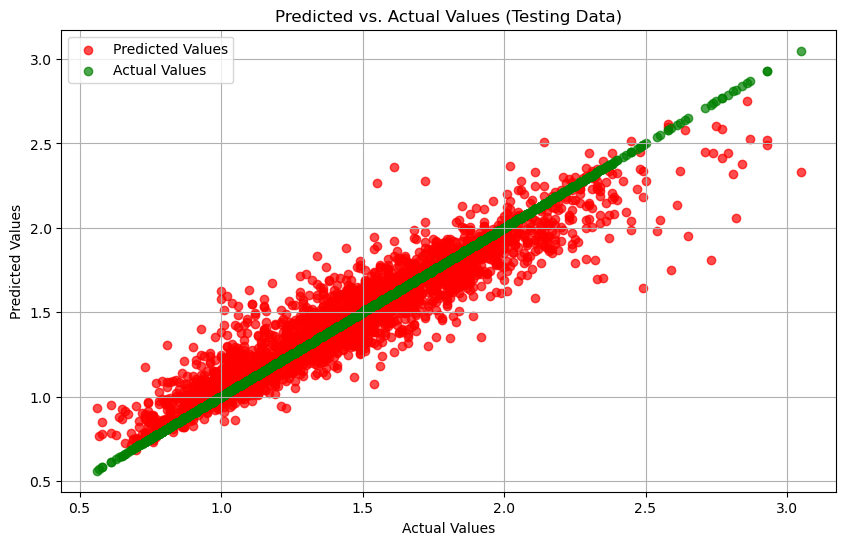

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, label='Predicted Values', color='red', alpha=0.7)

# Green for actual values
plt.scatter(y_test, y_test, label='Actual Values', color='green', alpha=0.7)  # Plot actual values directly on the diagonal

plt.title('Predicted vs. Actual Values (Testing Data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()